<a href="https://colab.research.google.com/github/ecomunick/omdena/blob/main/Advanced_DS/MLDS_2Assignment_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective: Implement and analyze various machine learning algorithms discussed in the lecture.

Task 1: Data Preparation (5 Marks)

*   Load a dataset of your choice.
*   Perform necessary data preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features.


### Let's use Medical insurance dataset from Kaggle

In [1]:
# Import Libraires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score

## Details of the data

### Dictionary
This dataset has 7 variable - 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region):

1. Age: age of primary beneficiary.

2. Sex: insurance contractor gender, female, male.

3. BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9.

4. Children: Number of children covered by health insurance/Number of dependents.

5. Smoker: Is the person a smoker or not.

6. Region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

7. Charges (expenses): Individual medical costs billed by health insurance.

In [2]:
df= pd.read_csv('/content/med_insurance.csv')

In [4]:
# Take a look at the dataset
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [6]:
# Checking the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
print("This dataset contains {} rows and {} columns.".format(df.shape[0], df.shape[1]))

This dataset contains 1338 rows and 7 columns.


In [13]:
# let's see the statistical description of numerica variables
df.describe().T # transpose the statistical description for a better view

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [16]:
# Expenses - Mean > Median implies the data is right skewed (positively skewed)
df.skew()

<ipython-input-16-81be6ebd34b3>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


age         0.055673
bmi         0.284593
children    0.938380
expenses    1.515880
dtype: float64

In [14]:
# let's see the statistical description of categorical variables
df.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


## Exploratory Data Analysis

Let's see a pairplot visualizing relationships between pairs of variables in the medical insurance dataset, with data points colored by gender ('sex'). Each scatterplot represents the relationship between two variables, allowing for the examination of correlations and distributions within different gender categories.

<Figure size 3500x3500 with 0 Axes>

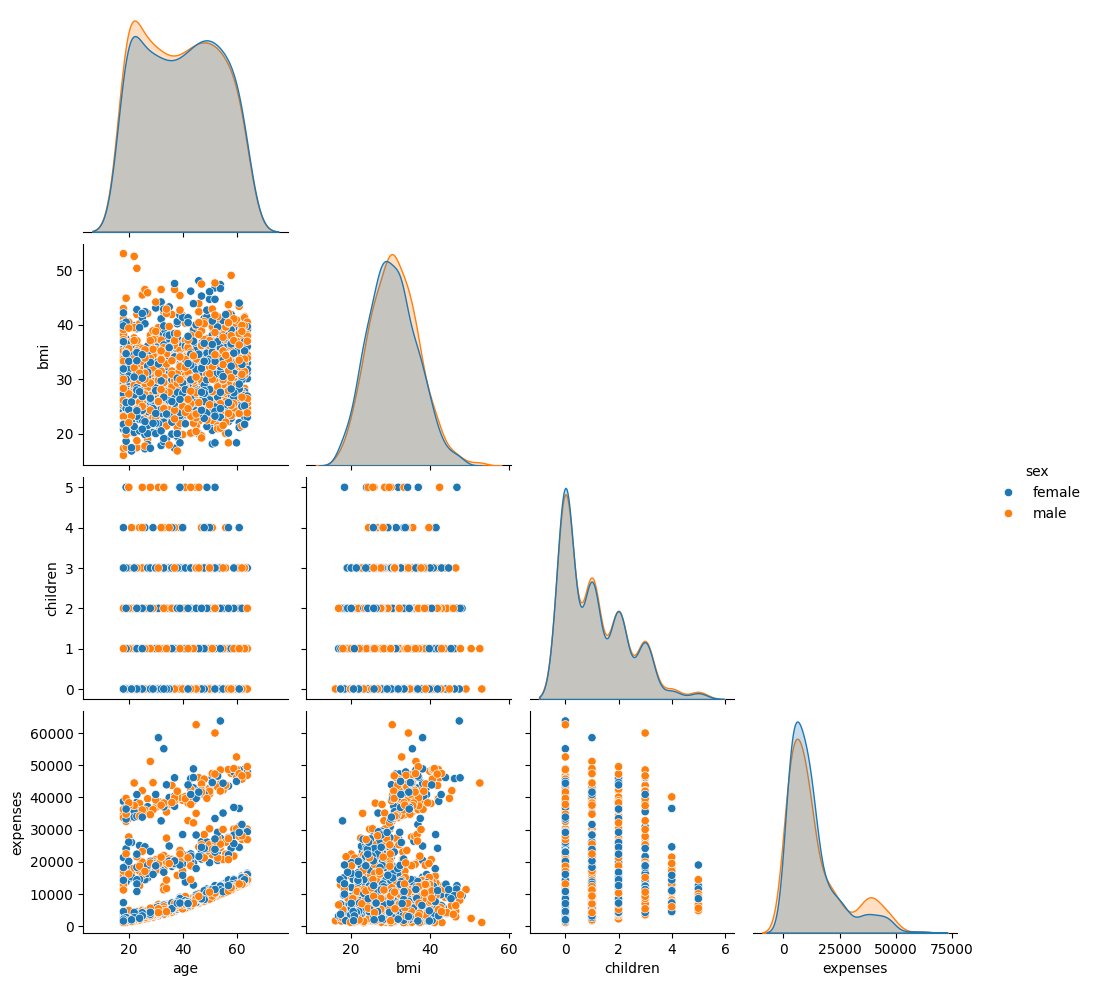

In [17]:
plt.figure(figsize=(35,35))
sns.pairplot(data=df, hue='sex', corner = True)

In [20]:
# Looks like the expense increase with ages for both genders but at the end, is not a clear a differention between genders.

Let's see now a pairplot visualizing relationships between pairs of variables in the medical insurance dataset, with data points colored by gender ('smoker'). Each scatterplot represents the relationship between two variables, allowing for the examination of correlations and distributions within different smoker categories.



<Figure size 3500x3500 with 0 Axes>

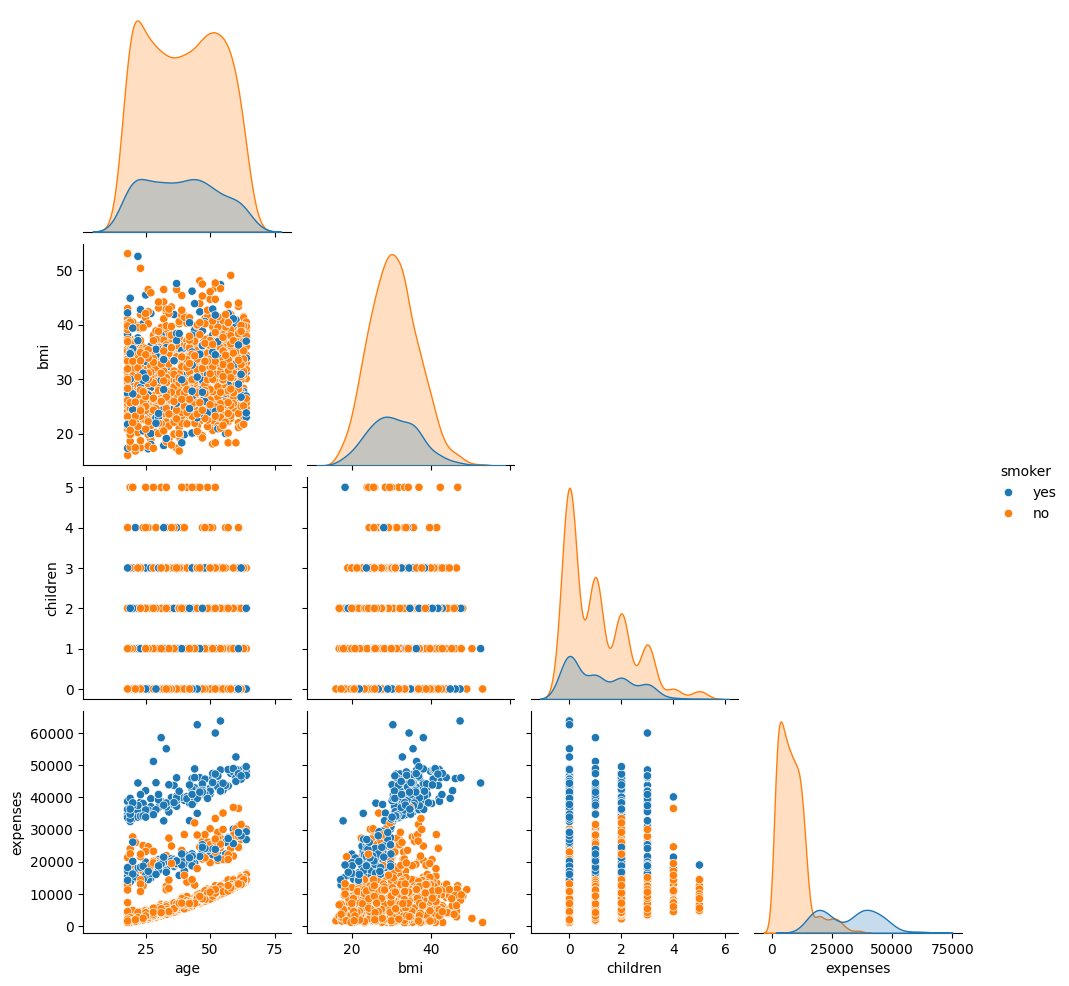

In [19]:
plt.figure(figsize=(35,35))
sns.pairplot(data=df, hue='smoker', corner = True)

In [21]:
# Is clearly visible that smokers people pay high expenses in medical insurance.
# let's have a look in those 2 variables

<Axes: xlabel='expenses', ylabel='Count'>

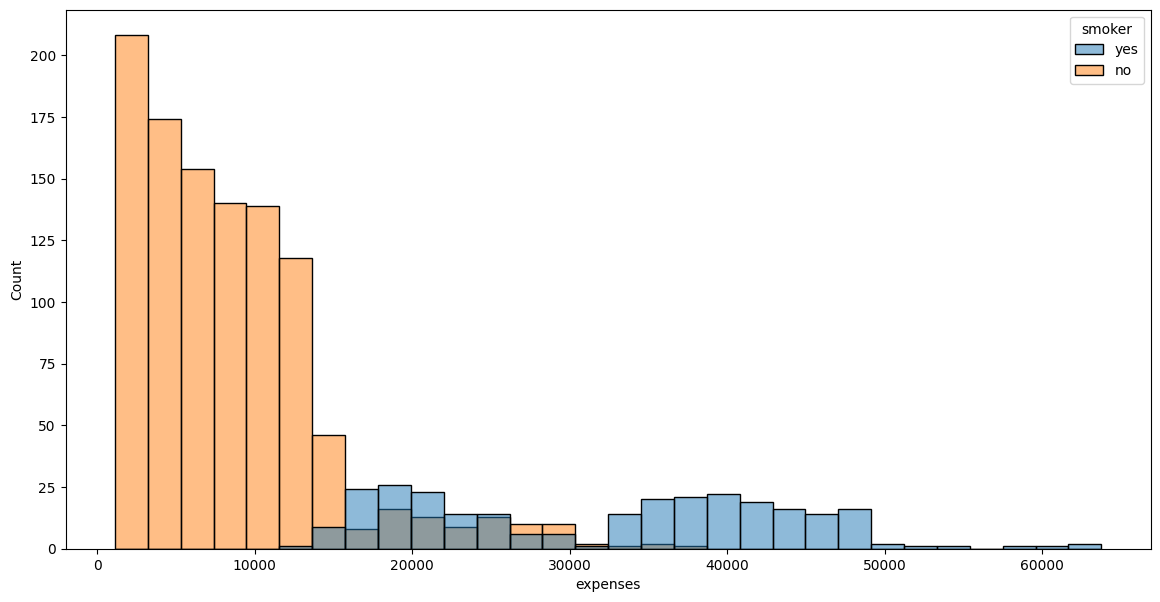

In [31]:
plt.figure(figsize=(14,7))
sns.histplot(data=df, x='expenses', hue='smoker')

In [33]:
# Smokers seem to have higher charges
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [39]:
# Get value counts for the 'smoker' column
smoker_counts = df['smoker'].value_counts()

# Calculate percentages and round to 2 decimal places
smoker_percentages = ((smoker_counts / len(df)) * 100).round(2)

print(smoker_percentages)

# even though unbalanced smokers data

no     79.52
yes    20.48
Name: smoker, dtype: float64
